In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


Propertycrime = α + Population + Population2 + Murder + Robbery

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [2]:
df = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', header=4,)

df
display(df.columns)

data= pd.DataFrame(df) 

needed_data = data.loc[:, ['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
needed_data.columns = ['Population', 'Murder', 'Robbery']

needed_data = needed_data.dropna()

needed_data.Robbery = needed_data.Robbery.where(needed_data.Robbery == 0, 1)
needed_data.Murder = needed_data.Murder.where(needed_data.Murder == 0, 1)

needed_data["population2"] = needed_data["Population"]**2


print (needed_data)

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

     Population  Murder  Robbery     population2
0      1861.000   0.000    0.000     3463321.000
1      2577.000   0.000    0.000     6640929.000
2      2846.000   0.000    0.000     8099716.000
3     97956.000   1.000    1.000  9595377936.000
4      6388.000   0.000    1.000    40806544.000
5      4089.000   0.000    1.000    16719921.000
6      1781.000   0.000    0.000     3171961.000
7    118296.000   1.000    1.000 13993943616.000
8      9519.000   0.000    1.000    90611361.000
9     18182.000   0.000    1.000   330585124.000
10     2053.000   0.000    0.000     4214809.000
11     4523.000   0.000    1.000    20457529.000
12      658.000   0.000    0.000      432964.000
13     2522.000   0.000    0.000     6360484.000
14    27270.000   1.000    1.000   743652900.000
15     3333.000   0.000    1.000    11108889.000
16     7473.000   0.000    1.000    55845729.000
17     5418.000   0.000    1.000    29354724.000
18    15374.000   0.000    1.000   236359876.000
19     5733.000   0.

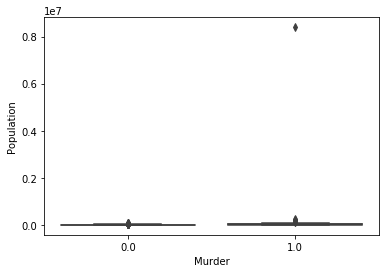

In [3]:
sns.boxplot(
    needed_data.Murder,
    needed_data.Population,
)
plt.xlabel('Murder')
plt.ylabel('Population')
plt.show()

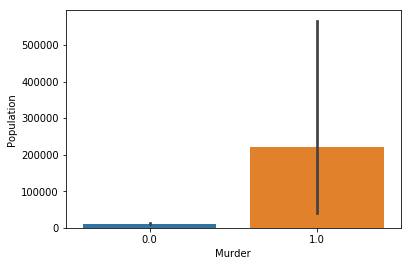

In [4]:
sns.barplot(x='Murder', y='Population', data=needed_data)
plt.show()